In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("labeled_data.csv")

In [3]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
dataset["labels"] = dataset["class"].map({0:"hate speech",
                                        1:"offence",
                                        2:"no hate"})

In [8]:
data = dataset[["tweet","labels"]]

In [9]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offence
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offence
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offence
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offence
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offence
24779,"you've gone and broke the wrong heart baby, an...",no hate
24780,young buck wanna eat!!.. dat nigguh like I ain...,offence
24781,youu got wild bitches tellin you lies,offence


In [10]:
import re
import nltk
nltk.download('stopwords')
import string
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#import stope words 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [18]:
#impoort stemming
stemmer = nltk.SnowballStemmer("english")

In [19]:
#data clean
from nltk.stem.porter import PorterStemmer

def clean_data(text):
    # Convert text to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub('http?://\S+|www\.S+', ' ', text)
    
    # Remove text in brackets
    text = re.sub('\[.*?\]', '', text)
    
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove newlines
    text = re.sub('\n', '', text)
    
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', ' ', text)
    
    # Stop word removal
    text = [word for word in text.split() if word not in stop_words]
    text = " ".join(text)
    
    # Stemming the text
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    
    return text
'''def clean_data(text):
    text = str(text).lower()
    text = re.sub('http?://\S+|www\.S+',' ',text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'', text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*',' ',text)
    #stop wordremoval
    text = [word for word in text.split() if word not in stopwords]
    text = " ".join(text)
    #stemmi ng the text 
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text '''

'def clean_data(text):\n    text = str(text).lower()\n    text = re.sub(\'http?://\\S+|www\\.S+\',\' \',text)\n    text = re.sub(\'\\[.*?\\]\',\'\',text)\n    text = re.sub(\'<.*?>+\',\'\',text)\n    text = re.sub(\'[%s]\' %re.escape(string.punctuation),\'\', text)\n    text = re.sub(\'\n\',\'\',text)\n    text = re.sub(\'\\w*\\d\\w*\',\' \',text)\n    #stop wordremoval\n    text = [word for word in text.split() if word not in stopwords]\n    text = " ".join(text)\n    #stemmi ng the text \n    text = [stemmer.stem(word) for word in text]\n    text = " ".join(text)\n    return text '

In [20]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\basav\AppData\Local\Temp\ipykernel_8156\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [22]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,no hate
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,offence
2,rt urkindofbrand dawg rt ever fuck bitch start...,offence
3,rt cganderson vivabas look like tranni,offence
4,rt shenikarobert shit hear might true might fa...,offence
...,...,...
24778,you muthafin lie coreyemanuel right tl trash m...,offence
24779,youv gone broke wrong heart babi drove redneck...,no hate
24780,young buck wanna eat dat nigguh like aint fuck...,offence
24781,youu got wild bitch tellin lie,offence


In [23]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [24]:
x

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt boy dat coldtyga dwn bad cuffin dat hoe place',
       'rt urkindofbrand dawg rt ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin di',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [26]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [27]:
x

<24783x25708 sparse matrix of type '<class 'numpy.int64'>'
	with 197870 stored elements in Compressed Sparse Row format>

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [29]:
#building ml model
from sklearn.tree import DecisionTreeClassifier


In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(x_test)

In [32]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
cn

array([[ 158,   41,  266],
       [  34, 1118,  227],
       [ 235,  235, 5865]], dtype=int64)

In [33]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

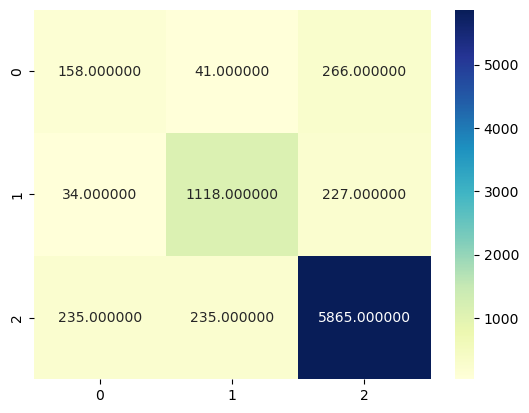

In [34]:
sns.heatmap(cn, annot=True, fmt="f", cmap="YlGnBu")

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8730896197579167

In [36]:
sample = "let unitte and kill all the people who are protesting against the government "
sample = clean_data(sample)


In [37]:
sample

'let unitt kill peopl protest govern'

In [38]:
data1 = cv.transform([sample]).toarray()

In [39]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
dt.predict(data1)

array(['hate speech'], dtype=object)